# Image Analysis

In [16]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The image is a matrix with dimensions: (512, 512, 3) which means 512 by 512 pixels and three channels
The image values range from 3 (minimum pixel value) to 255 (maximum pixel value)
The datatype of the pixelvalues is stored as: <class 'numpy.uint8'> (integers)


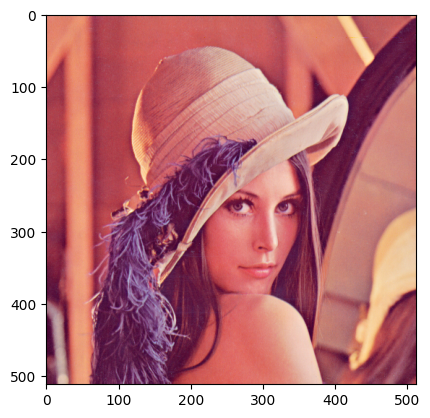

In [17]:
# Load image
image = cv2.imread('../../data/lenna_test_image.png')

# Convert BGR-space to RGB-space (OpenCV loads images in BGR-space)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Print the shape, range, and data type of the image
print("The image is a matrix with dimensions: " + str(np.shape(image)) + ' which means 512 by 512 pixels and three channels')
print("The image values range from " + str(np.min(image)) + ' (minimum pixel value) to ' + str(np.max(image)) + ' (maximum pixel value)')
print("The data type of the pixel values is stored as: " + str(type(image[0,0,0])) + ' (integers)')

# Show image
plt.imshow(image)  
plt.show()  

## Convert image to grayscale

The image is a matrix with dimensions: (512, 512) which means 512 by 512 pixels and one channel


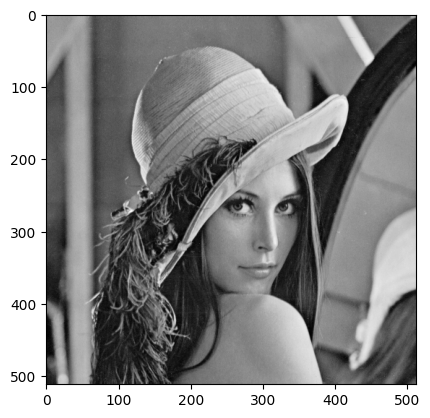

In [18]:
# Convert RGB-image to grey scale image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Print the shape of the image
print("The image is a matrix with dimensions: " + str(np.shape(gray)) + ' which means 512 by 512 pixels and one channel')

# Show image
plt.imshow(gray, cmap='gray') 
plt.show()  

## Image histogram

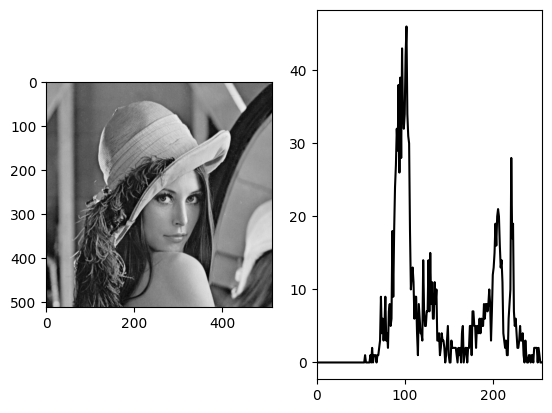

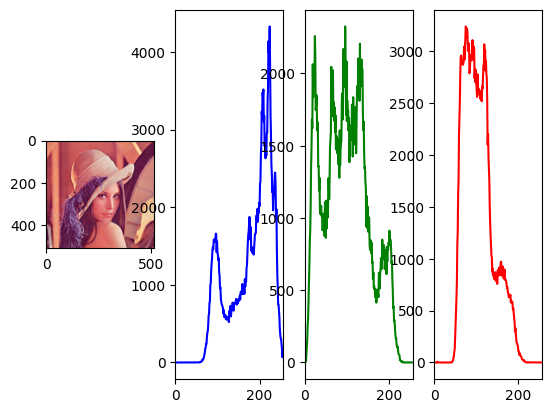

In [19]:
# Split BGR-channels
bgr_planes = cv2.split(image)

# Plot gray image
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
    
# Plot gray histogram
plt.subplot(1, 2, 2)
hist = cv2.calcHist(image, [1], None, [256], [0, 256])
plt.plot(hist, color='k')
plt.xlim([0, 256])
    
# Plot bgr image
plt.figure(2)
plt.subplot(1, 4, 1)
plt.imshow(image)
    
# Plot color histogram
for i, col in enumerate(['b', 'g', 'r']):
    plt.subplot(1, 4, i + 2)
    hist = cv2.calcHist(bgr_planes, [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

## Image 3D plot

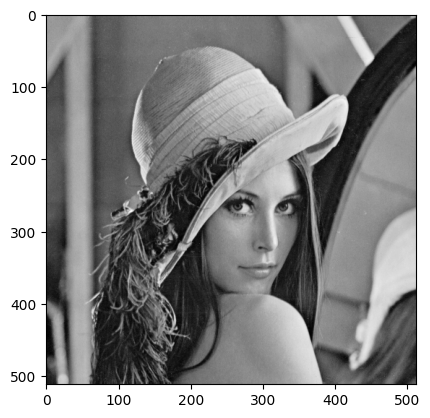

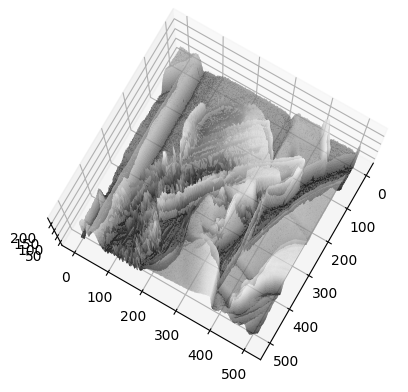

In [20]:
# Plot image
plt.imshow(gray, cmap='gray')

# Generate a meshgrid
xx, yy = np.mgrid[0:gray.shape[0], 0:gray.shape[1]]

# Plot pixel values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, gray, rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=2)
ax.view_init(80, 30)
plt.show()